# Distributions - Continuous

There are many types of data distributions. Many of them look similar and are hard to differentiate if one has no intuitive basis for differentiating between them. One has to understand statistical properties like moments, characteristic functions, and cumulative distributions to differentiate them. 

### Fitting the distribution

If you want to fit a distribution to a dataset, start by answering the following questions about the data:
* Does the data take on only discrete values or is the data continous?
* Look at the symmetry of the data and if there is asymmetry, which direction does it lie in? In order words, are the positive and negative outliers equally likely or is one more likely than the other?
* What are the upper or lower limits on the data? For example, salary cannot be lower than zero wheras others like grades scored by students cannot exceed a value (100%)
* What is the likelihood of observing extreme values in the distribution? In some data, extreme values occur rarely but in others, they occur very often. 

## Are the data discrete or continuous values?

Considering, for example, financial datasets about companies. Market size, market share, and profit margins are all continuous variables. However, there are some variables that can take on only discrete forms. 

For example, the regulatory authority may dispense one of two or more decisions which are specified up front. Another example could be the year value. Years are not encoded in partial years like 2018.5, instead of 2018. Each year is a discrete value. 

## Probability Density Functions

Continuous random variables have supports that look like $$S_x = [a, b] \quad or \quad (a, b)$$ or unions of intervals of the above form. Examples of random variable that are often taken to be continous are:

* the height or weight of an individual
* other physical measurements such as the length or size of an object, and
* durations of time (usually)

Every continuous random variable X has a probability (PDF) denoted f(x). 

For example, A = [c, d], in which case

$$P(X \in A) = \int_c^d f_x(x) dx$$

It follows that the probability that X falls in a given interval is simply the area under the curve of $f_x(X)$ over the interval. 

## How symmetric is the data?

There are some datasets that exhibut symmetry (ie, the upside is mirrored by the downside). The most common symmetric distribution is the normal distribution, which is shown below for a range of parameters.

In [8]:
x <- seq(-10, 10, by = 0.4)
y1 <- dnorm(x, mean = 0, sd = 1)
y2 <- dnorm(x, mean = 0, sd = 2)
y3 <- dnorm(x, mean = 0, sd = 5)

In [9]:
head(x)

[1] -10.0  -9.6  -9.2  -8.8  -8.4  -8.0

In [10]:
head(y1)

[1] 7.694599e-23 3.878112e-21 1.665588e-19 6.095758e-18 1.901082e-16
[6] 5.052271e-15

In [11]:
head(y2)

[1] 7.433598e-07 1.980650e-06 5.070426e-06 1.247124e-05 2.947153e-05
[6] 6.691511e-05

In [12]:
head(y3)

[1] 0.01079819 0.01263131 0.01468136 0.01695527 0.01945645 0.02218417

In [13]:
df <- data.frame(x = rep(x, 3), y = c(y1, y2, y3), class = c(rep("y1", 51), rep("y2", 51), rep("y3", 51)))

In [14]:
head(df, 20)

x,y,class
-10.0,7.694599e-23,y1
-9.6,3.878112e-21,y1
-9.2,1.665588e-19,y1
-8.8,6.095758e-18,y1
-8.4,1.901082e-16,y1
-8.0,5.052271e-15,y1
-7.6,1.144156e-13,y1
-7.2,2.207990e-12,y1
-6.8,3.630962e-11,y1
-6.4,5.088140e-10,y1


In [15]:
library(ggplot2)

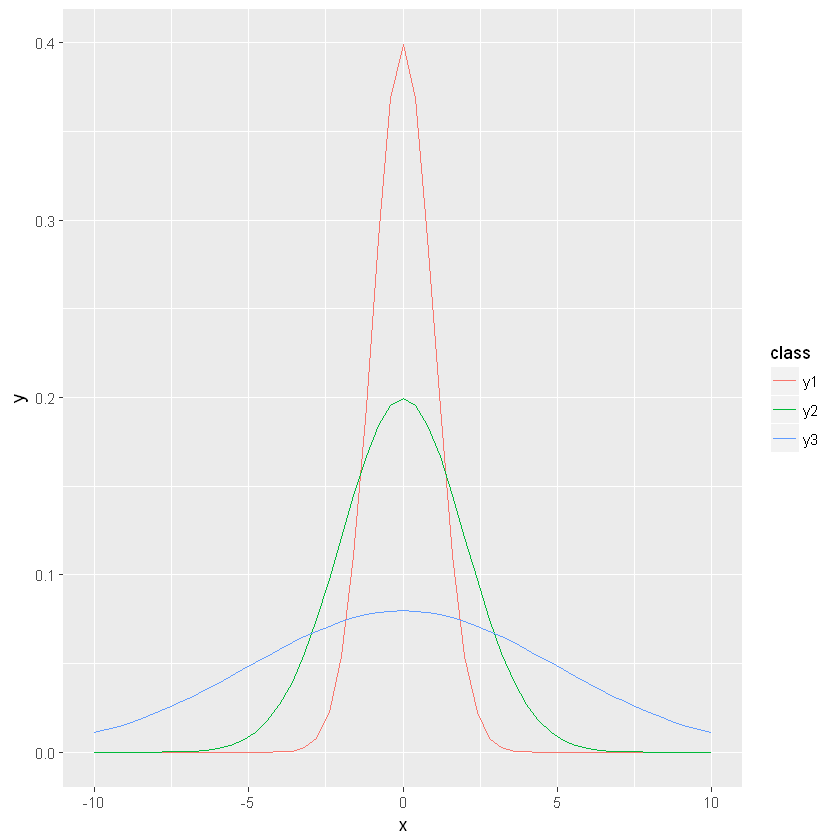

In [16]:
ggplot(df, aes(x = x, y = y, color = class)) + geom_line()

## Normal distribution

The normal distribution has several features that make it popular. First, it can be fully characterized by just 2 parameters - the mean and the standard deviation. That makes things easier. 

Second, the probability of any value occurring can be obtained simply by knowing how many standard deviations separate the value from the mean; the probability that a value will fall within 2 standard deviations from the mean is roughly 95%. 

The normal distribution is best suited for data that, at the minimum, meets the following conditions:

1) There is a strong tendency for the data to take on a central value. 
2) Positive and negative deviations from this central value are equally likely (there is no skew in any one direction)
3) The frequency of the deviations falls off rapidly as we move further away from the central value (extreme values are less likely to occur)

The last 2 conditions show up when we compute the parameters of the normal distribution; the symmetry of deviations leads to zero skewness and the low probabilities of large deviations from the central value reveal themselves in no kurtosis. 

### Misinterpreting data as normally distributed

Sometimes, we tend to use a normal distribution to characterize data that is non-normal. The probability estimates that we obtain will be misleading. One obvious problem is when the data is assymmetric but another potential problem is when the probabilities of large deviations from the central value do not drop off as precipitously as required by the normal distribution. This means actual distribution of the data has fatter tails than the normal. 

A normal distribution can have data spread in different ways, such as skewed towards a side (either left or right) but in many cases tends to be around a central value with no biases. Many scenarios in everyday life follow a normal distribution like heights of people, errors in measurements, grades on tests, etc. We can say that the data is normally distributed if the following conditions are met. 

A normally distributed dataset satisfies the following:
* mean = median = mode
* symmetry about the center
* 50% of values are below the mean and 50% are above the mean

There are many things you can do if you know that the distribution is normal. For example, if you know standard deviation of a normal distribution, you can say that any values is:
* likely to be within 1 standard deviation (68 out of 100 should be)
* very likely to be within 2 standard deviation (95 out of 100 should be)
* almost certainly within 3 standard deviations (997 out of 1000 should be)

##### Example:

95% of students at a certain school are between 1.1m and 1.7m tall. With how much confidence can you tell that one of your friends, who is 1.85m tall, is taller than the students at the school?

* The mean is the middle (1.1 + 1.7) / 2 = 1.4
* The standard deviation is half of 95% on either side of the mean (1.7 - 1.1) / 4 = 0.15

So where does your friend's height sit in the distribution? We'd have to calculate the z-score:

* z-score = (friend's height - mean height) / standard deviation
* z-score = (1.85 - 1.4) / 0.15 = 3
* z-score of 3 implies a confidence level of 99.9%. So with a confidence of 99%, you can say your friend (who is 1.85m tall), is taller than students at the school. 

## Logistic Distribution:

Logistic distributions are when the data is symmetric but with extreme values that occur more frequently than expected with a normal distribution. 

A logistic distribution can be written as $X ~ logis(location = \mu; scale = \sigma)$. 
The associated R function is `dlogis(x,location = 0, scale = 1)`. The logistic distribution comes up in differential equations as a model for population growth under certain assumptions. 

The mean is $\mu$ and the variance is $\frac{{\pi}^2 scale^2}{3}$.

In [17]:
x <- seq(-10, 10, by = 0.4)
y1 = dlogis(x, location = 0, scale = 1)
y2 = dlogis(x, location = 0, scale = 2)
y3 = dlogis(x, location = 0, scale = 5)

In [18]:
y1

[1] 4.539581e-05 6.771956e-05 1.010190e-04 1.506876e-04 2.247662e-04
 [6] 3.352377e-04 4.999509e-04 7.454723e-04 1.111298e-03 1.656049e-03
[11] 2.466509e-03 3.670666e-03 5.456199e-03 8.095944e-03 1.198134e-02
[16] 1.766271e-02 2.588959e-02 3.763177e-02 5.403811e-02 7.625500e-02
[21] 1.049936e-01 1.397638e-01 1.778944e-01 2.139097e-01 2.402607e-01
[26] 2.500000e-01 2.402607e-01 2.139097e-01 1.778944e-01 1.397638e-01
[31] 1.049936e-01 7.625500e-02 5.403811e-02 3.763177e-02 2.588959e-02
[36] 1.766271e-02 1.198134e-02 8.095944e-03 5.456199e-03 3.670666e-03
[41] 2.466509e-03 1.656049e-03 1.111298e-03 7.454723e-04 4.999509e-04
[46] 3.352377e-04 2.247662e-04 1.506876e-04 1.010190e-04 6.771956e-05
[51] 4.539581e-05

In [19]:
y2

[1] 0.003324028 0.004047972 0.004926382 0.005990668 0.007277880 0.008831353
 [7] 0.010701240 0.012944797 0.015626234 0.018815884 0.022588330 0.027019057
[13] 0.032179150 0.038127500 0.044900165 0.052496793 0.060864670 0.069881896
[19] 0.079342449 0.088947220 0.098305967 0.106954848 0.114392120 0.120130373
[25] 0.123758286 0.125000000 0.123758286 0.120130373 0.114392120 0.106954848
[31] 0.098305967 0.088947220 0.079342449 0.069881896 0.060864670 0.052496793
[37] 0.044900165 0.038127500 0.032179150 0.027019057 0.022588330 0.018815884
[43] 0.015626234 0.012944797 0.010701240 0.008831353 0.007277880 0.005990668
[49] 0.004926382 0.004047972 0.003324028

In [20]:
y3

[1] 0.02099872 0.02230260 0.02365365 0.02504859 0.02648330 0.02795276
 [7] 0.02945102 0.03097115 0.03250524 0.03404442 0.03557889 0.03709795
[13] 0.03859013 0.04004333 0.04144491 0.04278194 0.04404136 0.04521027
[19] 0.04627614 0.04722709 0.04805215 0.04874153 0.04928686 0.04968136
[25] 0.04992009 0.05000000 0.04992009 0.04968136 0.04928686 0.04874153
[31] 0.04805215 0.04722709 0.04627614 0.04521027 0.04404136 0.04278194
[37] 0.04144491 0.04004333 0.03859013 0.03709795 0.03557889 0.03404442
[43] 0.03250524 0.03097115 0.02945102 0.02795276 0.02648330 0.02504859
[49] 0.02365365 0.02230260 0.02099872

In [21]:
df <- data.frame(x = rep(x, 3), y = c(y1, y2, y3), class = c(rep("y1", 51), rep("y2", 51), rep("y3", 51)))

In [22]:
head(df)

x,y,class
-10.0,4.539581e-05,y1
-9.6,6.771956e-05,y1
-9.2,1.010190e-04,y1
-8.8,1.506876e-04,y1
-8.4,2.247662e-04,y1
-8.0,3.352377e-04,y1


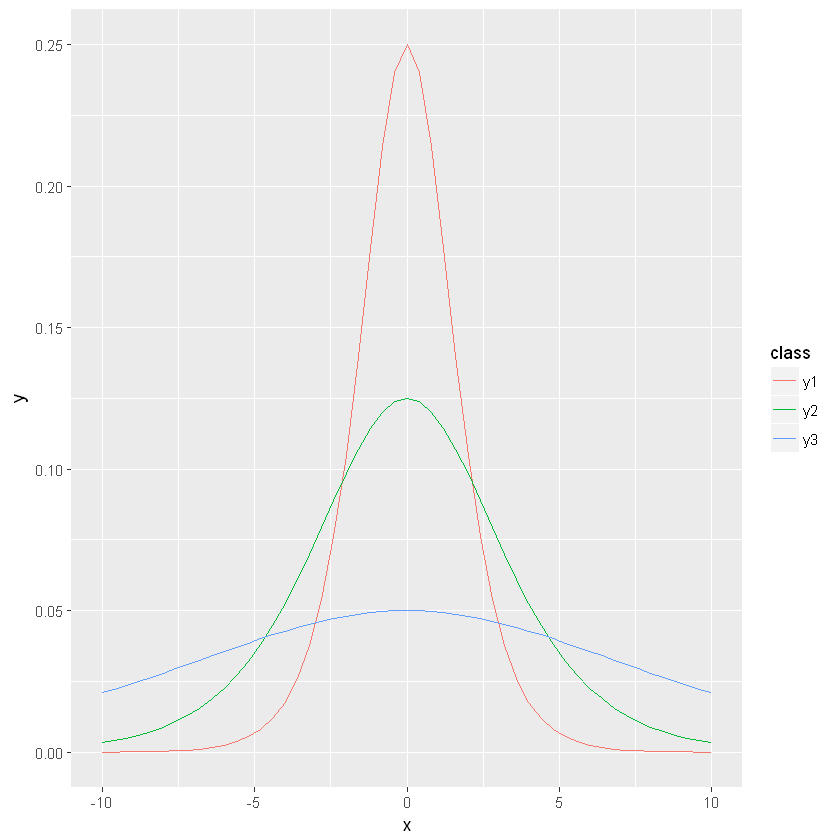

In [23]:
ggplot(df, aes(x = x, y = y, color = class)) + geom_line()

Compare the tails of the above distributions with the same parameters to that of normal distributions. Logistic distributions have fatter tails. 

## Log Normal Distribution

Many times, data do not exhibit symmetry and instead skew towards either very large positive or very large negative values. If the data is positively skewed, a common choice is the log normal distribution, which is typically characterized by 3 parameters: a shape (s or sigma), a scale (m or median), and a shift parameter ($\theta$).

* When m = 0 and ($\theta$) = 1, you have the standard lognormal distribution. 
* When ($\theta$) = 0, the distribution requires only scale and sigma parameters. 

As the sigma rises, the peak of the distribution shifts to the left and the skewness in the distribution increases. This is a distribution derived from the normal distribution. If we write U ~ $norm(mean =\mu, sd = \sigma), then \quad X = e^u$ has PDF. We can write 

$$X \sim lnorm(meanlog = \mu, sdlog = \sigma)$$

The associated R function is `dlnorm(x, meanlog = 0, sdlog = 1)`.

In [24]:
x <- seq(0, 10, by = 0.2)
y1 <- dlnorm(x, meanlog = 0, sdlog = 1)
y2 <- dlnorm(x, meanlog = 0, sdlog = 2)
y3 <- dlnorm(x, meanlog = 0, sdlog = 5)

In [25]:
y1

[1] 0.000000000 0.546267871 0.655444168 0.583573823 0.486415781 0.398942280
 [7] 0.326972024 0.269276229 0.223265447 0.186472449 0.156874019 0.132890686
[13] 0.113309754 0.097203259 0.083859205 0.072728256 0.063383656 0.055491406
[19] 0.048788135 0.043064619 0.038153457 0.033919783 0.030254236 0.027067575
[25] 0.024286554 0.021850715 0.019709889 0.017822239 0.016152709 0.014671790
[31] 0.013354538 0.012179782 0.011129482 0.010188210 0.009342725 0.008581626
[37] 0.007895064 0.007274504 0.006712529 0.006202676 0.005739296 0.005317442
[43] 0.004932766 0.004581444 0.004260099 0.003965747 0.003695741 0.003447734
[49] 0.003219633 0.003009577 0.002815902

In [26]:
y2

[1] 0.00000000 0.72149192 0.44899498 0.32178298 0.24779183 0.19947114
 [7] 0.16553669 0.14047726 0.12127407 0.10613334 0.09392210 0.08388980
[13] 0.07551982 0.06844516 0.06239815 0.05717911 0.05263618 0.04865190
[19] 0.04513404 0.04200926 0.03921850 0.03671376 0.03445558 0.03241130
[25] 0.03055365 0.02885968 0.02730996 0.02588796 0.02457949 0.02337235
[31] 0.02225596 0.02122114 0.02025985 0.01936507 0.01853059 0.01775094
[37] 0.01702128 0.01633727 0.01569509 0.01509129 0.01452278 0.01398678
[43] 0.01348080 0.01300257 0.01255005 0.01212138 0.01171486 0.01132896
[49] 0.01096228 0.01061352 0.01028151

In [27]:
y3

[1] 0.000000000 0.378800976 0.196149631 0.132288560 0.099636297 0.079788456
 [7] 0.066446190 0.056862856 0.049647952 0.044021683 0.039512718 0.035819347
[13] 0.032739464 0.030132591 0.027898058 0.025961835 0.024268267 0.022774714
[19] 0.021447952 0.020261716 0.019194969 0.018230663 0.017354837 0.016555950
[25] 0.015824380 0.015152039 0.014532081 0.013958673 0.013426814 0.012932191
[31] 0.012471067 0.012040187 0.011636701 0.011258108 0.010902198 0.010567015
[37] 0.010250822 0.009952068 0.009669367 0.009401475 0.009147273 0.008905749
[43] 0.008675992 0.008457174 0.008248540 0.008049406 0.007859147 0.007677190
[49] 0.007503010 0.007336127 0.007176098

In [28]:
df <- data.frame(x = rep(x, 3), y = c(y1, y2, y3), class = c(rep("y1", 51), rep("y2", 51), rep("y3", 51)))

In [29]:
head(df)

x,y,class
0.0,0.0000000,y1
0.2,0.5462679,y1
0.4,0.6554442,y1
0.6,0.5835738,y1
0.8,0.4864158,y1
1.0,0.3989423,y1


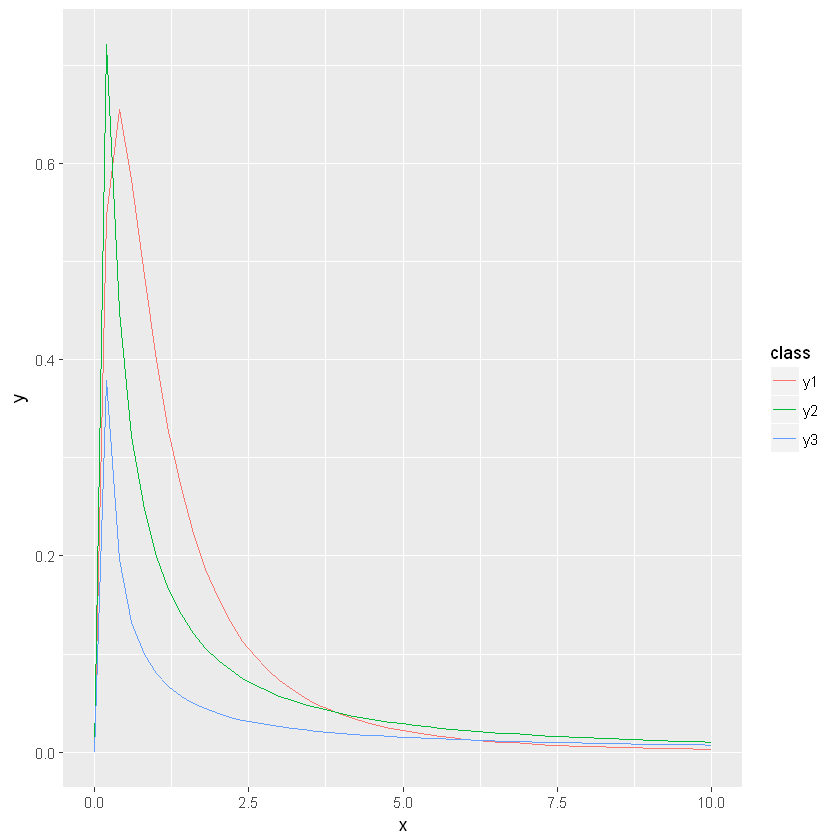

In [30]:
ggplot(df, aes(x = x, y = y, color = class)) + geom_line()

## Waiting time distributions

In some experiments, the random variable being measured is the time until a certain event occurs. For example, a quality control specialist may be testing a manufactured product to see how long it takes until it fails. An efficiency expert may be recording the customer traffic at a retail store to streamline schedling of staff. 

### Exponential distribution

We say that X has an exponential distribution and write X ~ exp(rate = $\lambda$).

$$f_x(x) = \lambda e^{-\lambda x},\quad x > 0$$

The associated R functions are `dexp(x, rate = 1)`, `pexp`, `qexp`, and `rexp`, 
which give the PDF, CDF, quantile function, and simulate random variates, respectively. 
The parameter $\lambda$ measures the rate of arrivals and must be positive. 
The mean is $\mu = 1/{\lambda}$ and the variance is $\sigma^2 = 1/{\lambda^2}$.

In [31]:
x <- seq(0, 5, by = 0.1)
y1 <- dexp(x, rate = 1)
y2 <- dexp(x, rate = 2)
y3 <- dexp(x, rate = 5)

In [33]:
df <- data.frame(x = rep(x, 3), y = c(y1, y2, y3), class = c(rep("y1", 51), rep("y2", 51), rep("y3", 51)))

In [34]:
head(df)

x,y,class
0.0,1.0000000,y1
0.1,0.9048374,y1
0.2,0.8187308,y1
0.3,0.7408182,y1
0.4,0.6703200,y1
0.5,0.6065307,y1


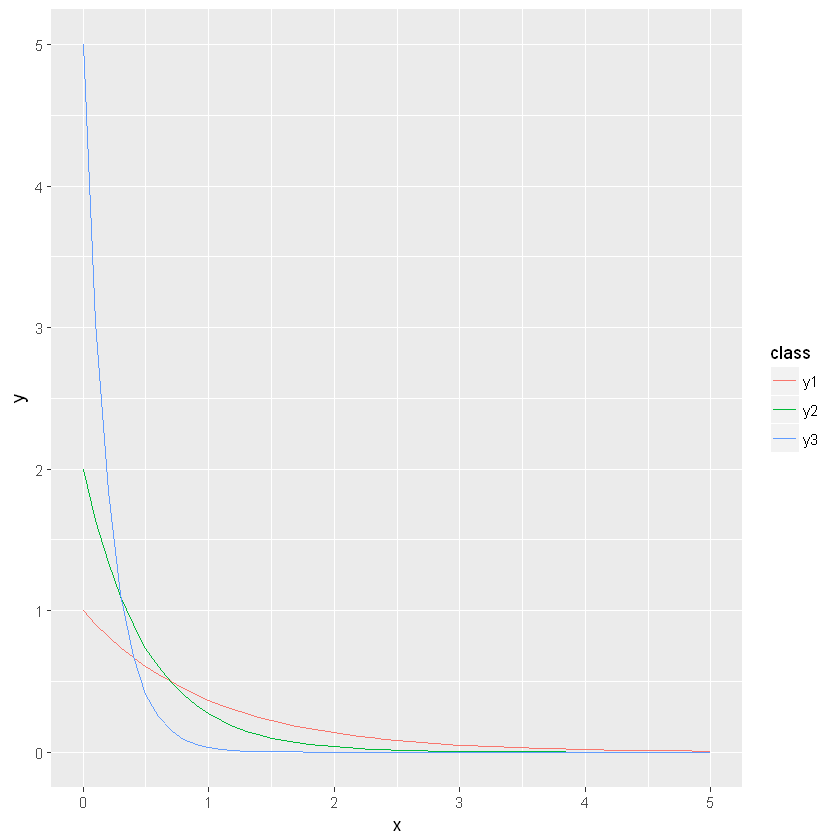

In [35]:
ggplot(df, aes(x = x, y = y, color = class)) + geom_line()

## Gamma distribution

This is a generalization of the exponential distribution. We say that X has a gamma distribution and write X ~ gamma(shape = $\alpha$; rate = $\lambda$). 

The associated R functions are `dgamma(x, shape, rate = 1)`, `pgamma`, `qgamma`, and `rgamma`, 
which give the PDF, CDF, quantile function, and simulate random variates, respectively. 
If $\alpha$ = 1 then X ~ exp(rate = $\lambda$). 
The mean is $\mu = \alpha / \lambda$ and the variance is $\sigma^2 = \alpha / \lambda^2$.

Gamma distribution: 
if X measures the length of time until the first event occurs in a Poisson process with rate $\lambda$ then X ~ exp(rate = $\lambda$). 
If we let Y measure the length of time until the $\alpha^{th}$ event occurs then 

$$Y \sim gamma(shape = \alpha, rate = \lambda)$$

#### Example:

At a car wash, two customers arrive per hour on the average. We decide to measure how long it takes until the third customer arrives. 

If Y denotes this random time then Y ~ gamma(shape = 3, rate = 1 = 2)

In [36]:
x <- seq(0, 5, by = 0.1)
y1 <- dgamma(x, shape = 2, rate = 1)
y2 <- dgamma(x, shape = 2, rate = 2)
y3 <- dgamma(x, shape = 5, rate = 3)

In [37]:
df <- data.frame(x = rep(x, 3), y = c(y1, y2, y3), class = c(rep("y1", 51), rep("y2", 51), rep("y3", 51)))

In [38]:
head(df)

x,y,class
0.0,0.00000000,y1
0.1,0.09048374,y1
0.2,0.16374615,y1
0.3,0.22224547,y1
0.4,0.26812802,y1
0.5,0.30326533,y1


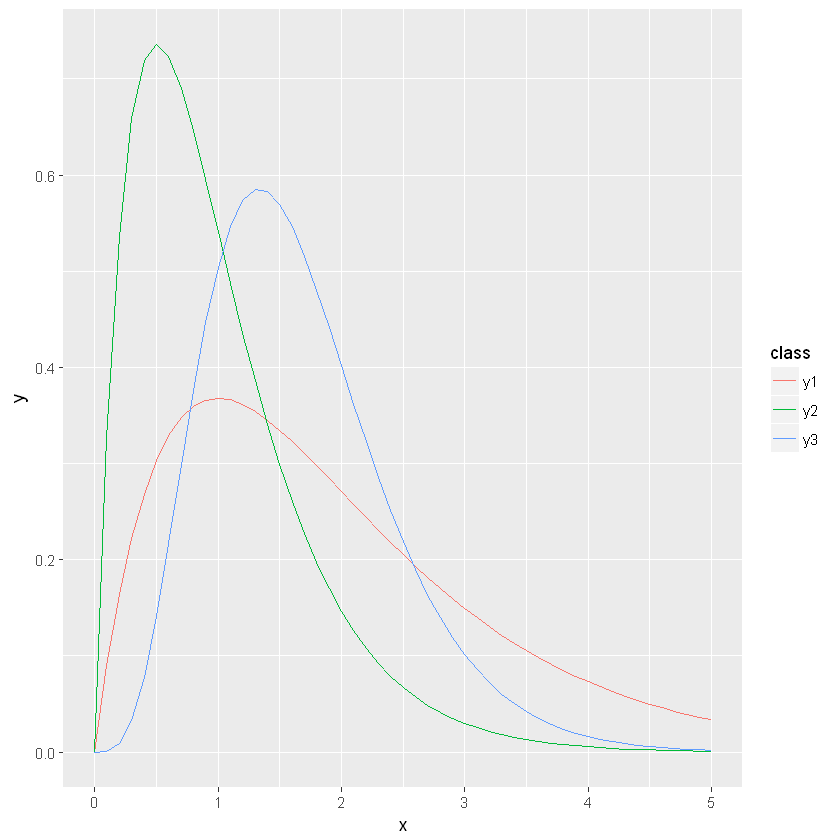

In [39]:
ggplot(df, aes(x = x, y = y, color = class)) + geom_line()

## Upper and lower limits on data values

There are often natural limits on the values that data can take on. For example, the revenues and the market value of a firm cannot be negative and the profit margin cannot exceed 100%. Using a distribution that does not contrain the values to these limits can create problems. For instance, using a normal distribution to describe profit margins can sometimes result in profit margins that exceed 100% since the distribution has no limits on either the downside or the upside. 

When the data is constrained, the questions that needs to be answered are whether the constraints apply on one side of the distribution or both and if so, what the limits on the values are. Once these questions have been answered, there are 2 choices. One is to find a continuous distribution that conforms to these constraints. 

For instance, the log normal distribution can be used to model data, such as revenue or stock prices that are constrained to be never less than zero. 

For data that have both upper and lower limits, you can use the uniform distribution if the probabilities of the outcomes are even across outcomes or a triangular distribution (if the data is clustered around a central value).



## How likely are you to see extreme values of data...relative to the middle values?

A key consideration in what distribution to use to describe the data is the likelihood of extreme values for the data, relative to the middle value. In the case of the normal distribution, this likelihood is small and it increases as you move to the logistic distributions. While it may be often more realistic to use the latter to describe real world data, the benefits of a better distribution fit have to be weighed against the ease with which parameters can be estimated from the normal distribution. Consequently, it may make sense to stay with the normal distribution for symmetric data, unless the likelihood of extreme values increases above a threshold. 

The same considerations apply for skewed distributions, though the concern will generally be more acute for the skewed side of the distribution. In other words, with positively skewed distributions, the question of which distribution to use will depend upon how much more likely large positive values are than large negative values, with the fit ranging from the log normal to the exponential. 

In summary, the question of which distribution best fits data cannot be answered without looking at whether the data is discrete or continuous, symmetric or asymmetric, and where the outliers lie. 

### There are 3 types of measures to understand a distribution
* Measures of central tendency
* Measures of dispersion
* Measures to describe the shape of curve

#### Measures of central tendency:

Mean, median, and mode are measures of central tendency. They help you describe a population through a single metric. For example, if you want to compare the average salary of a professor with other professions, you will compare their mean salaries. Of all 3, the mean is the one which is most affect by outliers, followed by the median, and the mode

#### Measures of dispersion:

Range, quartiles, interquartile range, variance, and standard deviations are measures of dispersion. They tell us how is the population distributed around the measures of central tendency.

#### Measures to describe the shape of distribution:

* Skewness is used to measure the assymmetries of a distribution. Negatively skewed distribution has a long tail and vice-versa. 
* Kurtosis is used to measure the height of the "peak" of the curve. Distributions with higher peaks have positie kurtosis and vice-versa

https://www.analyticsvidhya.com/blog/2014/07/statistics/

In [42]:
download.file("http://www.openintro.org/stat/data/bdims.RData", destfile = "bdims.RData")
load("bdims.RData")
head(bdims)

# body dimensions dataset

bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,...,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,...,33.0,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5,1


When describing the data, we can plot a normal distribution curve on top of a histogram to see how closely the data follows a normal distribution. We will work with women's heights to illustrate this. 

In [43]:
male <- subset(bdims, sex == 1)
female <- subset(bdims, sex == 0)

In [44]:
female_hgt_mean <- mean(female$hgt)
female_hgt_sd <- sd(female$hght)

In [45]:
summary(female$hgt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  147.2   160.0   164.5   164.9   169.5   182.9 

We will use a density histogram as a backdrop and use the lines function to overlay a normal probability curve. The difference between a frequency histograme and a density histogram is that while in a frequency histogram, the heights of the bars add up to the total number of observations, in a density histogram the areas of the bars add up to 1.

Using a density histogram allows us to properly overlay a normal distribution curver over the histogram since the curve is a normal probability density function. Frequency and density histograms both display the same exact shape; they only differ in their y-axis. 

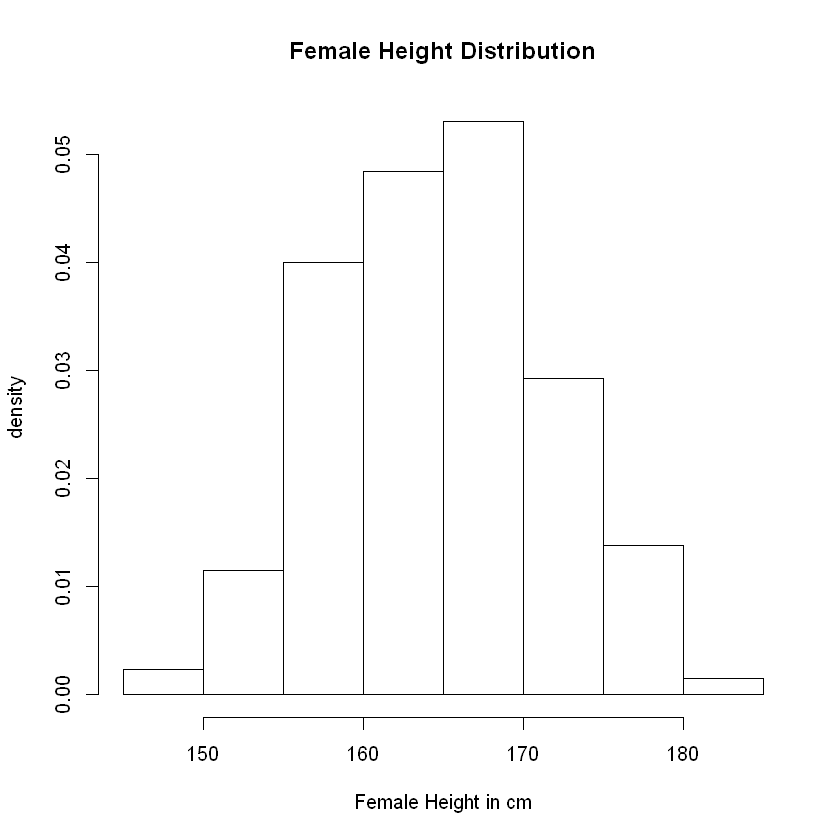

In [52]:
hist(female$hgt, probability = TRUE, main = "Female Height Distribution", xlab = "Female Height in cm", ylab = "density")
x <- 140:190
y <- dnorm(x = x, mean = female_hgt_mean, sd = female_hgt_sd)
lines(x = x, y = y, col = "blue")

The first command plots the density histogram. We then create the x and y coordinates for the normal curve. x range is chosen as 140 to 190 to cover the minimum height (147.2) and the maximum height (182.9). To create y, we use dnorm to calculate the density of each of those x-values in a distribution that is normal with mean female_hgt_mean and the standard deviation female_hgt_sd. The last command draws a density curve on the existing histogram by connecting x with the corresponding values of yh. 

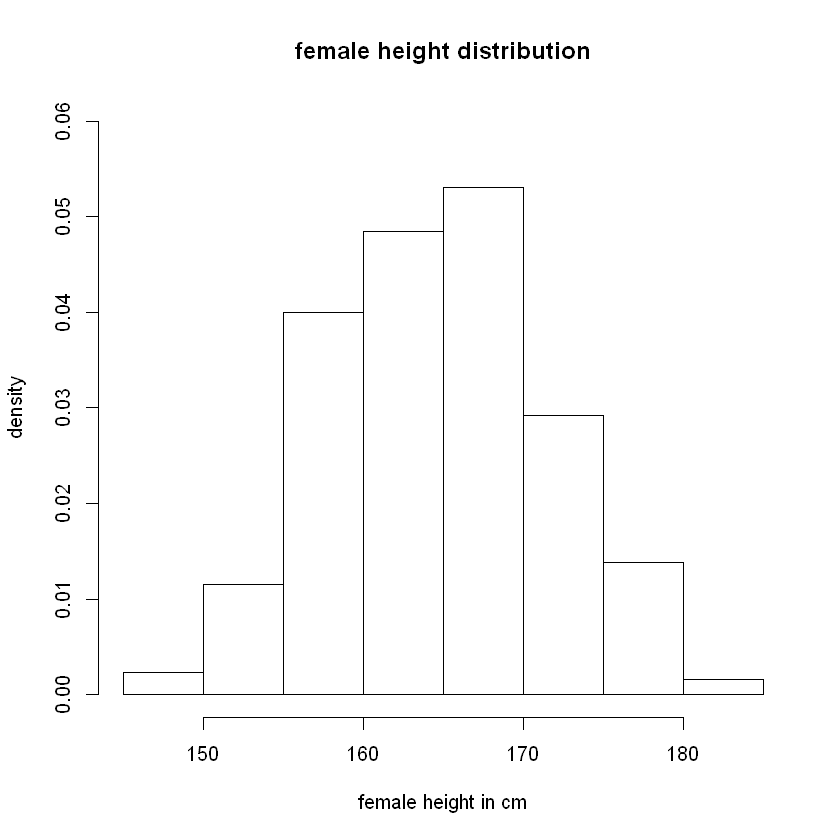

In [53]:
hist(female$hgt, probability = TRUE,main="female height distribution",xlab="female height in cm",ylab="density",ylim = c(0, 0.06))
x <- 140:190
y <- dnorm(x = x, mean = female_hgt_mean, sd = female_hgt_sd)
lines(x = x, y = y, col = "blue")